# 2 Dice Rolling with Maximum Neighborhood

## 1. Background
- Use dices with 1~6
- Roll 2 dices and add 2 numbers

## 2. Rules
- Assume maximum neighborhood transition with equal transition probability
- Probability symmetric matrix as below  

||2|3|4|5|6|7|8|9|10|11|12|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|**2**|1/11|1/11|1/11|1/11|1/11|1/11|1/11|1/11|1/11|1/11|1/11|
|**3**|1/11|1/11|1/11|1/11|1/11|1/11|1/11|1/11|1/11|1/11|1/11|
|**4**|1/11|1/11|1/11|1/11|1/11|1/11|1/11|1/11|1/11|1/11|1/11|
|**5**|1/11|1/11|1/11|1/11|1/11|1/11|1/11|1/11|1/11|1/11|1/11|
|**6**|1/11|1/11|1/11|1/11|1/11|1/11|1/11|1/11|1/11|1/11|1/11|
|**7**|1/11|1/11|1/11|1/11|1/11|1/11|1/11|1/11|1/11|1/11|1/11|
|**8**|1/11|1/11|1/11|1/11|1/11|1/11|1/11|1/11|1/11|1/11|1/11|
|**9**|1/11|1/11|1/11|1/11|1/11|1/11|1/11|1/11|1/11|1/11|1/11|
|**10**|1/11|1/11|1/11|1/11|1/11|1/11|1/11|1/11|1/11|1/11|1/11|
|**11**|1/11|1/11|1/11|1/11|1/11|1/11|1/11|1/11|1/11|1/11|1/11|
|**12**|1/11|1/11|1/11|1/11|1/11|1/11|1/11|1/11|1/11|1/11|1/11|

- Inter-state transition Markov matrix

||2|3|4|5|6|7|8|9|10|11|12|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|**2**|1/11|1/11|1/11|1/11|1/11|1/11|1/11|1/11|1/11|1/11|1/11|
|**3**|1/22|4/22|2/22|2/22|2/22|2/22|2/22|2/22|2/22|2/22|1/22|
|**4**|1/33|2/33|9/33|3/33|3/33|3/33|3/33|3/33|3/33|2/33|1/33|
|**5**|1/44|2/44|3/44|16/44|4/44|4/44|4/44|4/44|3/44|2/44|1/44|
|**6**|1/55|2/55|3/55|4/55|25/55|5/55|5/55|4/55|3/55|2/55|1/55|
|**7**|1/66|2/66|3/66|4/66|5/66|36/66|5/66|4/66|3/66|2/66|1/66|
|**8**|1/55|2/55|3/55|4/55|25/55|5/55|5/55|4/55|3/55|2/55|1/55|
|**9**|1/44|2/44|3/44|16/44|4/44|4/44|4/44|4/44|3/44|2/44|1/44|
|**10**|1/33|2/33|9/33|3/33|3/33|3/33|3/33|3/33|3/33|2/33|1/33|
|**11**|1/22|4/22|2/22|2/22|2/22|2/22|2/22|2/22|2/22|2/22|1/22|
|**12**|1/11|1/11|1/11|1/11|1/11|1/11|1/11|1/11|1/11|1/11|1/11|

In [1]:
import collections

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

In [2]:
states = np.array([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
cases = np.array([1, 2, 3, 4, 5, 6, 5, 4, 3, 2, 1])

prob_matrix = np.array([(i+1)/11 for i in range(11)])
print([round(x, 4) for x in prob_matrix])

[0.0909, 0.1818, 0.2727, 0.3636, 0.4545, 0.5455, 0.6364, 0.7273, 0.8182, 0.9091, 1.0]


In [3]:
records = list()
trials = 20000

for i in range(len(states)):
    record = [states[i]]
    for j in range(trials):
        current_state = record[-1]
        # transition
        next_state = (np.where(np.random.rand(1) < prob_matrix)[0][0]) + 2
        # move
        if np.random.rand(1) < np.minimum(1, cases[next_state-2]/cases[current_state-2]): 
            record.append(next_state)
        else:
            record.append(current_state)
    records.append(record)

In [4]:
distribution = np.zeros((len(states), len(states)))

for i in range(len(distribution)):
    for j, value in sorted(collections.Counter(records[i]).items(), key=lambda x: x[0]):
        distribution[i, j-2] = value
    print(distribution[i])

[ 576. 1140. 1573. 2111. 2885. 3472. 2886. 2143. 1584. 1046.  585.]
[ 555. 1132. 1693. 2316. 2628. 3300. 2861. 2250. 1634. 1099.  533.]
[ 573. 1081. 1577. 2185. 2833. 3274. 2829. 2239. 1713. 1121.  576.]
[ 552. 1101. 1611. 2214. 2924. 3284. 2829. 2262. 1636. 1071.  517.]
[ 547. 1105. 1620. 2132. 2764. 3420. 2879. 2214. 1680. 1077.  563.]
[ 589. 1098. 1754. 2147. 2783. 3100. 2877. 2339. 1607. 1126.  581.]
[ 564. 1074. 1687. 2206. 2872. 3210. 2924. 2148. 1653. 1094.  569.]
[ 599. 1119. 1679. 2206. 2776. 3316. 2784. 2257. 1656. 1069.  540.]
[ 564. 1106. 1672. 2143. 2738. 3405. 2667. 2371. 1629. 1117.  589.]
[ 548. 1111. 1614. 2288. 2982. 3298. 2815. 2095. 1600. 1112.  538.]
[ 607. 1097. 1702. 2143. 2763. 3356. 2849. 2179. 1624. 1151.  530.]


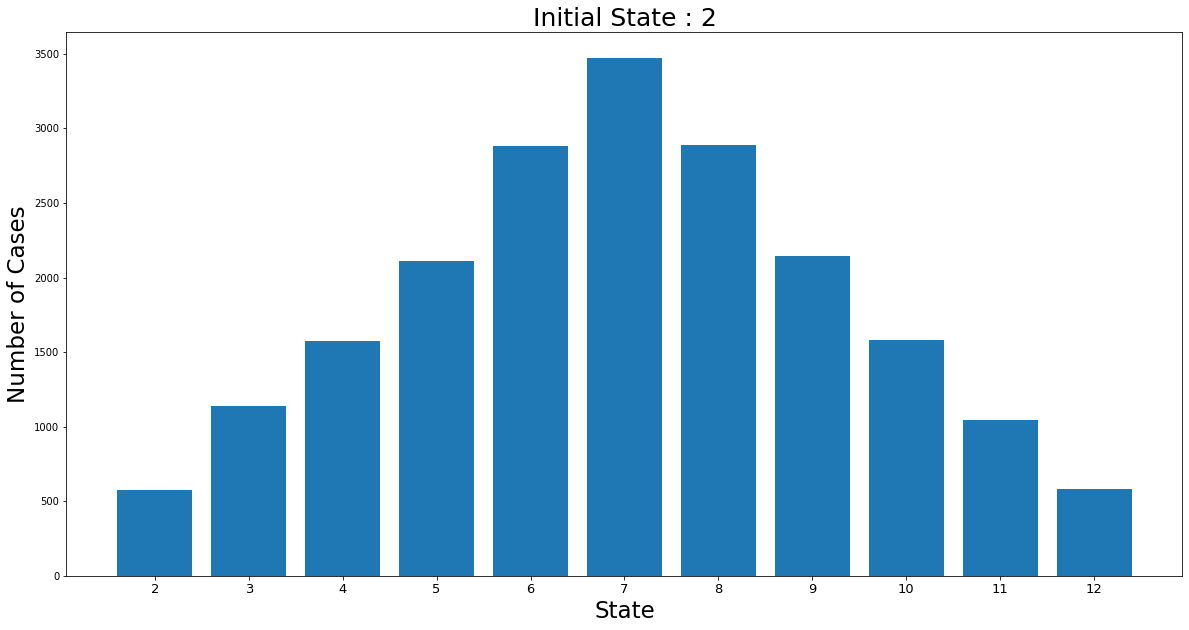

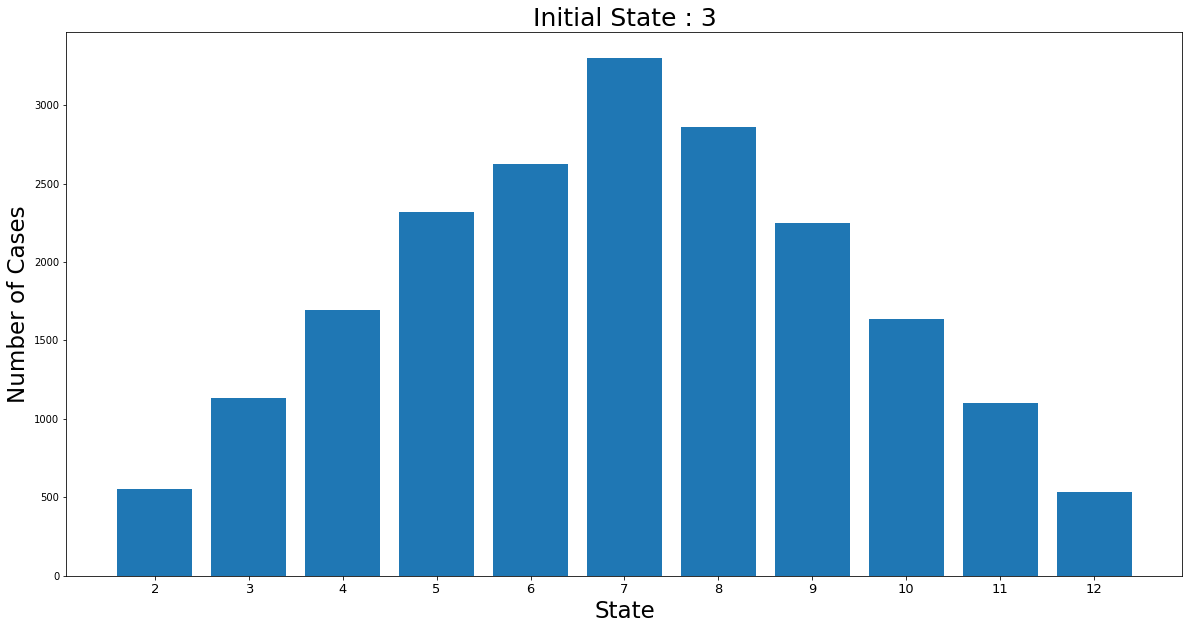

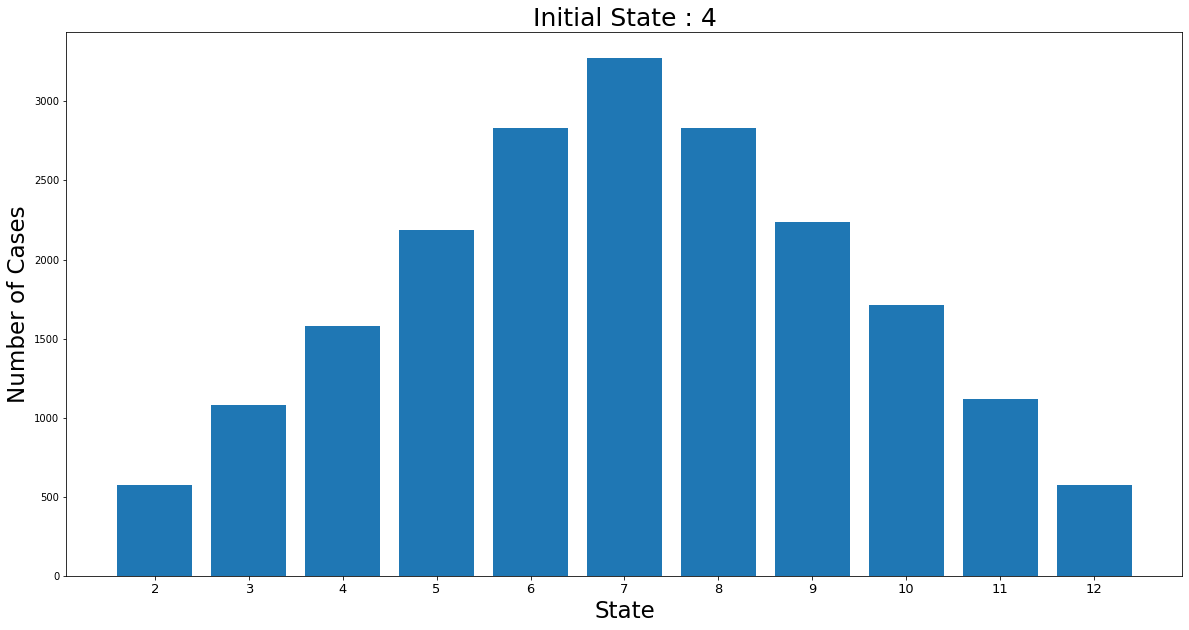

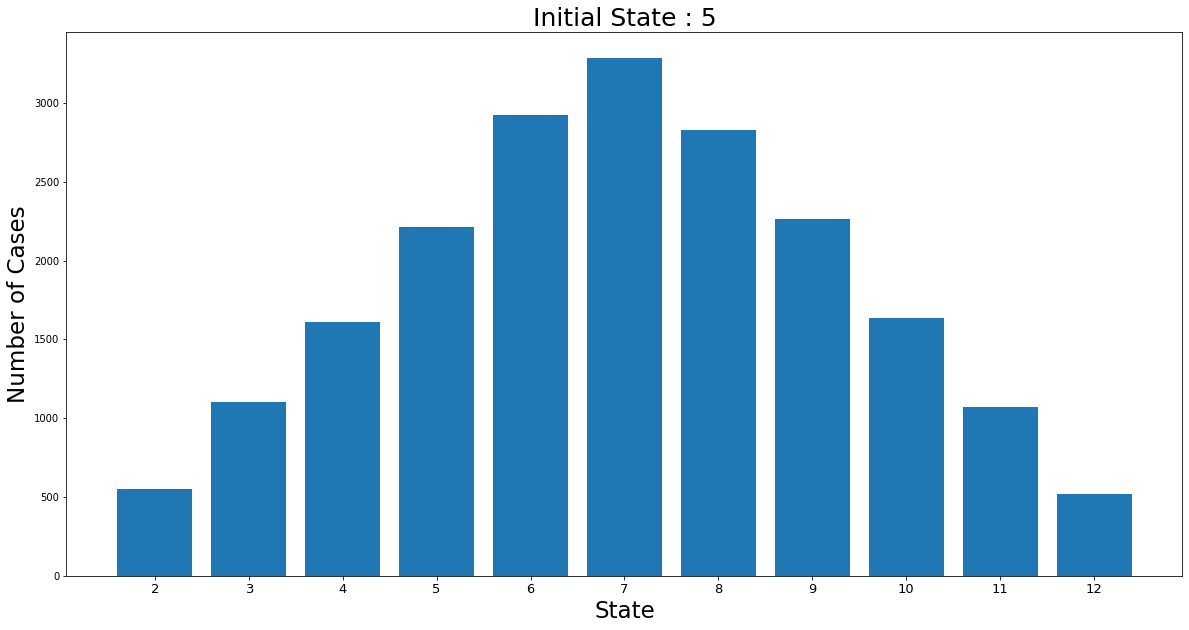

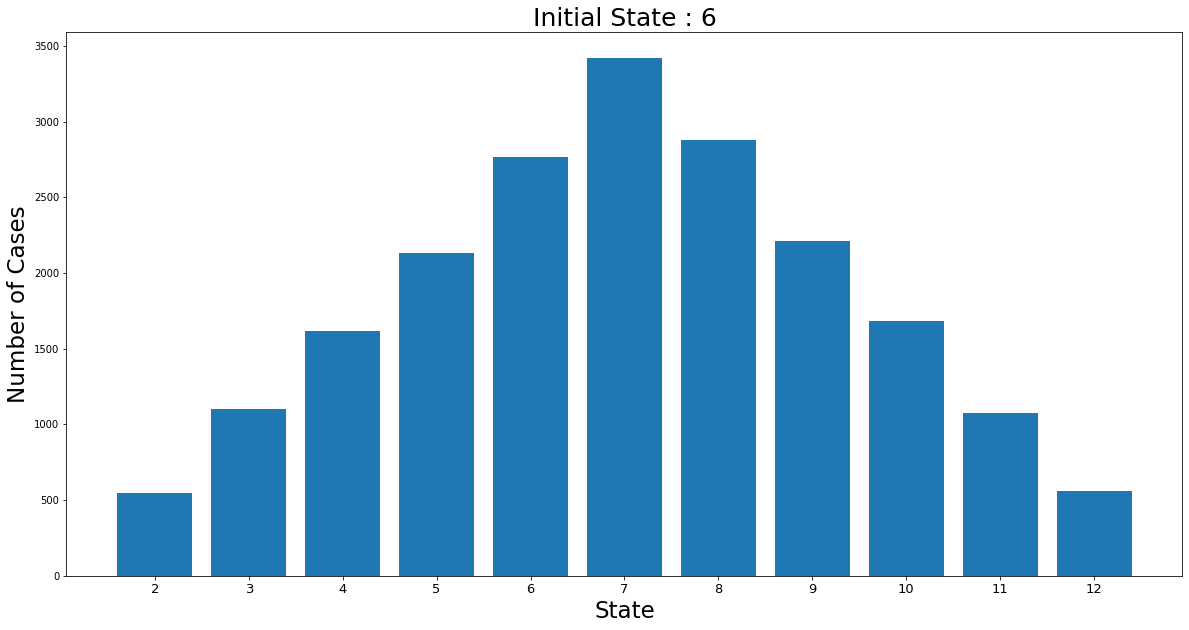

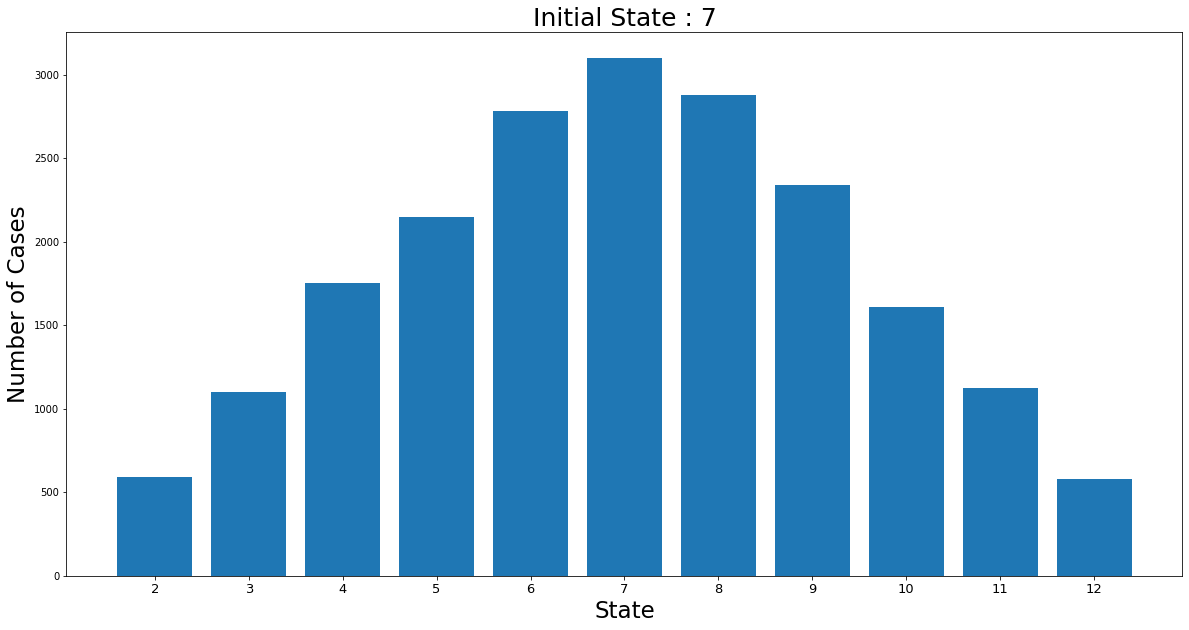

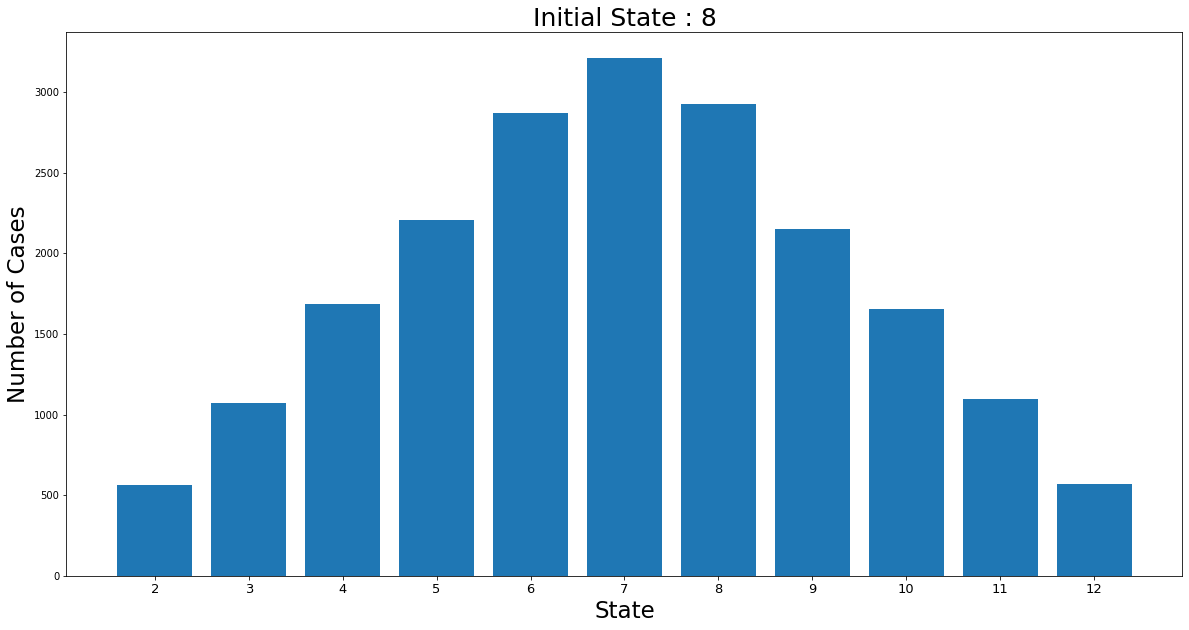

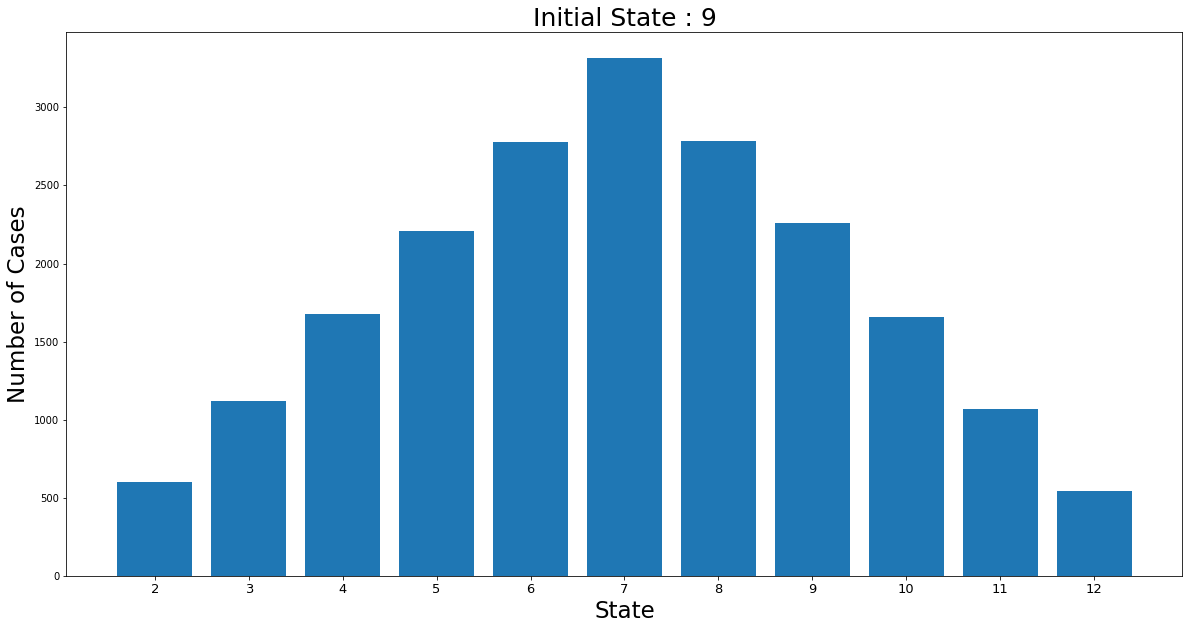

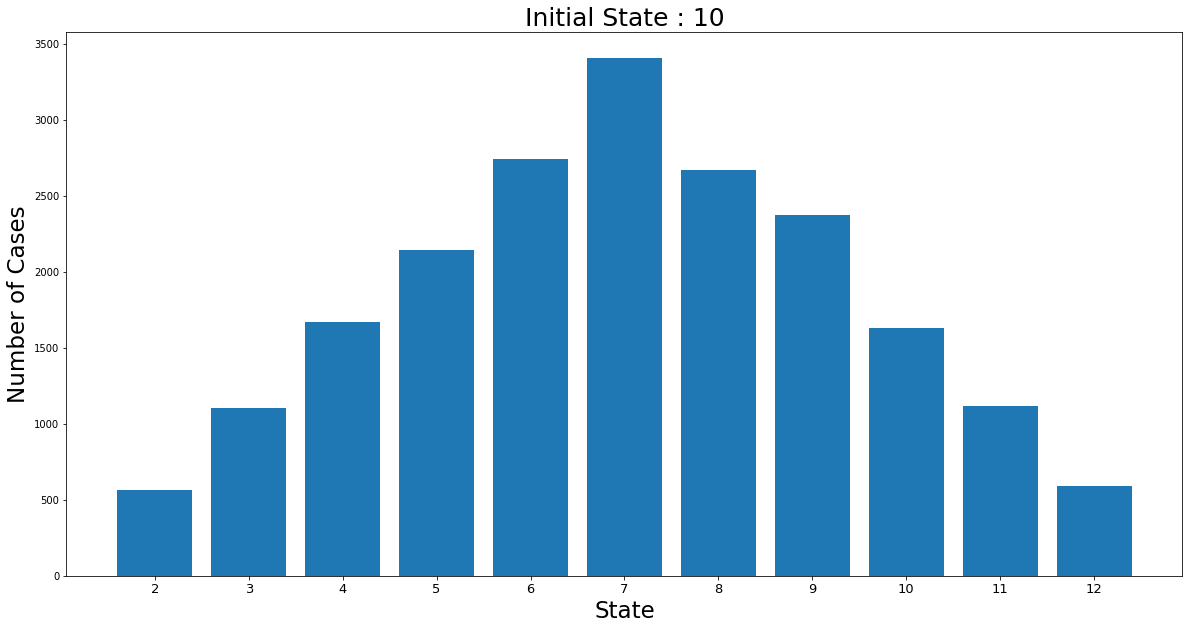

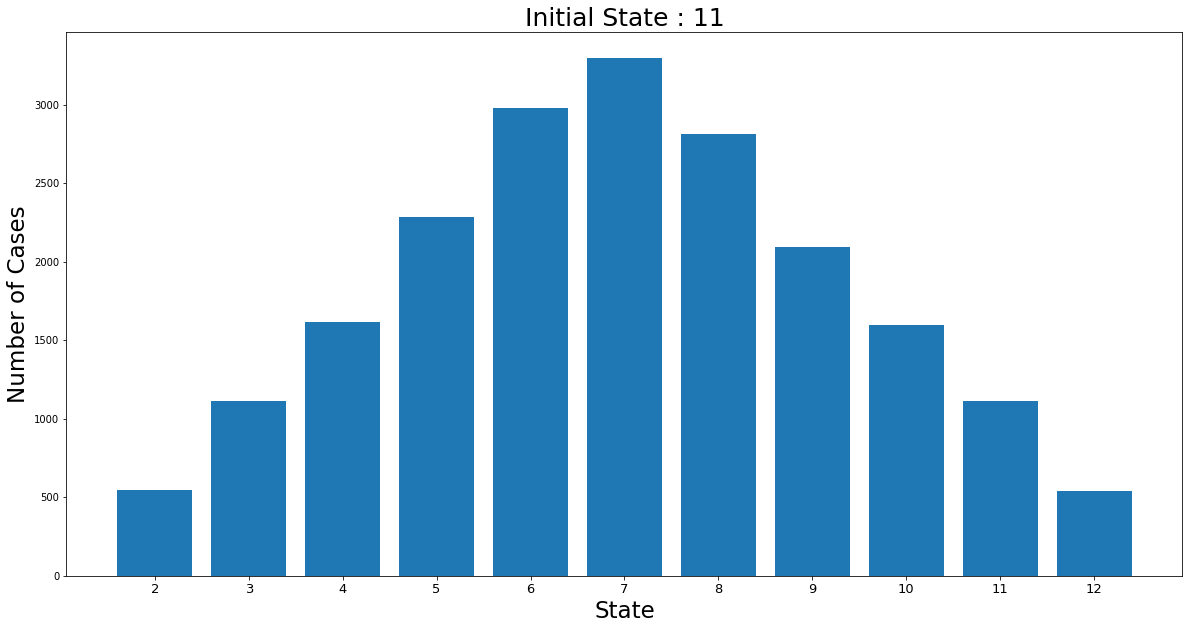

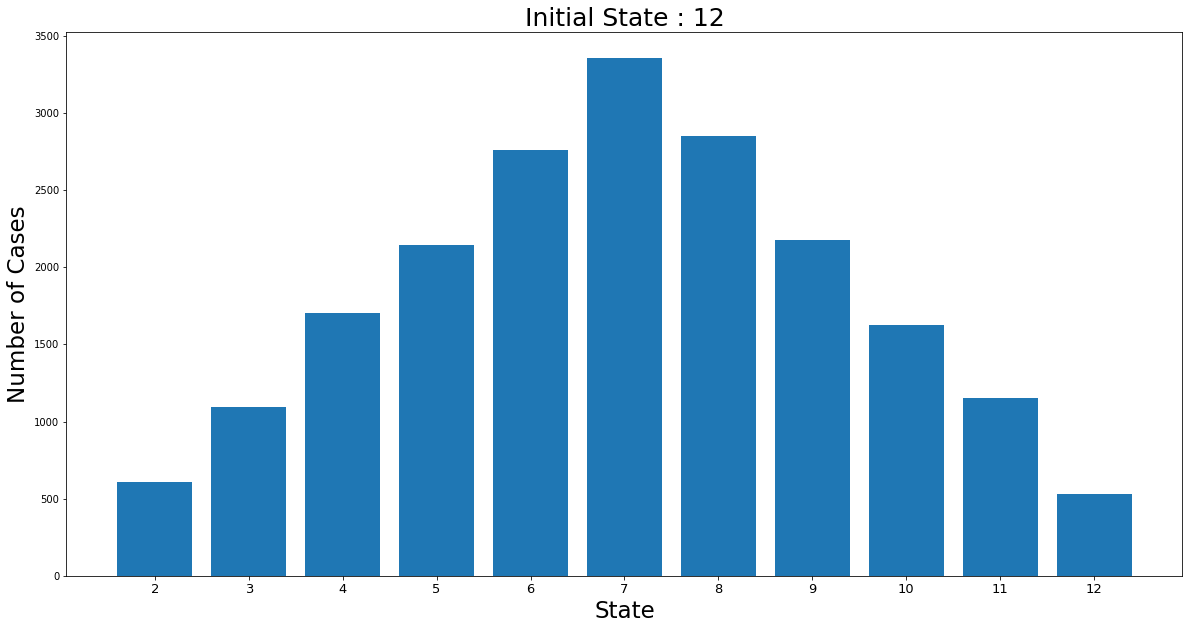

In [5]:
title_fontsize, label_fontsize, tick_fontsize = 25, 23, 13

for i, state in enumerate(states):
    plt.figure(figsize=(20, 10))
    plt.bar(states, distribution[i])
    plt.title('Initial State : ' + str(state), fontsize=title_fontsize)
    plt.xlabel('State', fontsize=label_fontsize)
    plt.ylabel('Number of Cases', fontsize=label_fontsize)
    plt.xticks(states, fontsize=tick_fontsize)
plt.show()